In [128]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from typing import List

In [86]:
drivers = pd.DataFrame()

driver_names = pd.Series(["hamilton", "bottas", "verstappen", "perez", "norris", "ricciardo", "leclerc", "sainz", "tsunoda", "gasly", "stroll", "vettel", "ocon", "alonso", "raikkonen", "giovinazzi", "schumacher", "mazepin", "russell", "latifi"])
driver_teammates = pd.Series(["bottas", "hamilton", "perez", "verstappen", "ricciardo", "norris", "sainz", "leclerc", "gasly", "tsunoda", "vettel", "stroll", "alonso", "ocon", "giovinazzi", "raikkonen", "mazepin", "schumacher", "latifi", "russell"])
driver_constructors = pd.Series(["mercedes", "mercedes", "red_bull", "red_bull", "mclaren", "mclaren", "ferrari", "ferrari", "alpha_tauri", "alpha_tauri", "aston_martin", "aston_martin", "alpine", "alpine", "alfa_romeo", "alfa_romeo", "haas", "haas", "williams", "williams"])
driver_prices = pd.Series([33.5, 23.6, 24.8, 18.4, 13.1, 16.8, 16.8, 14.4, 8.8, 11.7, 13.9, 16.2, 10.1, 15.6, 9.6, 7.9, 5.8, 5.5, 6.2, 6.5])

drivers["Names"] = driver_names
drivers["Teammates"] = driver_teammates
drivers["Constructors"] = driver_constructors
drivers["Prices"] = driver_prices

In [87]:
constructors = pd.DataFrame()

constructor_names = pd.Series(["mercedes", "red_bull", "mclaren", "ferrari", "alpha_tauri", "aston_martin", "alpine", "alfa_romeo", "haas", "williams"])
constructor_prices = pd.Series([38, 25.9, 18.9, 18.1, 12.7, 17.6, 15.4, 8.9, 6.1, 6.3])

constructors["Names"] = constructor_names
constructors["Prices"] = constructor_prices

In [88]:
constructors

,Names,Prices
0,mercedes,38.0
1,red_bull,25.9
2,mclaren,18.9
3,ferrari,18.1
4,alpha_tauri,12.7
5,aston_martin,17.6
6,alpine,15.4
7,alfa_romeo,8.9
8,haas,6.1
9,williams,6.3


In [206]:
class Team:

    def __init__(self, drivers, constructor, captain="random"):
        
        self._drivers = drivers
        self._constructor = constructor
        
        if captain == "random":
            eligible_captains = [driver for driver in drivers if driver.price <= 20]
            self._captain = random.sample(eligible_captains, 1)[0]
        else:
            self._catpain = captain
        
    @property
    def drivers(self):
        return self._drivers
    
    @property
    def captain(self):
        return self._captain
    
    @property
    def price(self):
        driver_prices = [driver.price for driver in self._drivers]
        return np.sum(driver_prices) + self._constructor.price
    
    @property
    def constructor(self):
        return self._constructor

In [207]:
class Driver:
    
    def __init__(self, name: str, constructor: str, price: float, teammate: str):
        
        self._name = name
        self._constructor = constructor
        self._price = price
        self._teammate = teammate
        
    @property
    def name(self):
        return self._name
    
    @property
    def constructor(self):
        return self._constructor
    
    @property
    def price(self):
        return self._price
    
    @property
    def teammate(self):
        return self._teammate

In [208]:
class Constructor:

    def __init__(self, name: str, price: float, drivers: List[str]):
        
        self._name = name
        self._price = price
        self._drivers = drivers
        
    @property
    def drivers(self):
        return self._drivers
    
    @property
    def name(self):
        return self._name
    
    @property
    def price(self):
        return self._price

In [209]:
hamilton = Driver(name="hamilton", constructor="mercedes", price=33.5, teammate="bottas")
bottas = Driver(name="bottas", constructor="mercedes", price=23.6, teammate="hamilton")

verstappen = Driver(name="verstappen", constructor="red_bull", price=24.8, teammate="perez")
perez = Driver(name="perez", constructor="red_bull", price=18.4, teammate="verstappen")

norris = Driver(name="norris", constructor="mclaren", price=13.1, teammate="ricciardo")
ricciardo = Driver(name="ricciardo", constructor="mclaren", price=16.8, teammate="norris")

leclerc = Driver(name="leclerc", constructor="ferrari", price=16.8, teammate="sainz")
sainz = Driver(name="sainz", constructor="ferrari", price=14.1, teammate="leclerc")

tsunoda = Driver(name="tsunoda", constructor="alpha_tauri", price=8.8, teammate="gasly")
gasly = Driver(name="gasly", constructor="alpha_tauri", price=11.7, teammate="tsunoda")

stroll = Driver(name="stroll", constructor="aston_martin", price=13.9, teammate="vettel")
vettel = Driver(name="vettel", constructor="aston_martin", price=16.2, teammate="stroll")

ocon = Driver(name="ocon", constructor="alpine", price=10.1, teammate="alonso")
alonso = Driver(name="alonso", constructor="alpine", price=15.6, teammate="ocon")

raikkonen = Driver(name="raikkonen", constructor="alfa_romeo", price=9.6, teammate="giovinazzi")
giovinazzi = Driver(name="giovinazzi", constructor="alfa_romeo", price=7.9, teammate="raikkonen")

schumacher = Driver(name="schumacher", constructor="haas", price=5.8, teammate="mazepin")
mazepin = Driver(name="mazepin", constructor="haas", price=5.5, teammate="schumacher")

russell = Driver(name="russell", constructor="haas", price=6.2, teammate="latifi")
latifi = Driver(name="latifi", constructor="haas", price=6.5, teammate="russell")

all_drivers = [hamilton, bottas, verstappen, perez, norris, ricciardo, leclerc, sainz, tsunoda, gasly, stroll, vettel, ocon, alonso, raikkonen, giovinazzi, schumacher, mazepin, russell, latifi]

In [210]:
mercedes = Constructor(name="mercedes", price=38.0, drivers=["hamilton", "bottas"])
red_bull = Constructor(name="red_bull", price=25.9, drivers=["verstappen", "perez"])
mclaren = Constructor(name="mclaren", price=18.9, drivers=["norris", "ricciardo"])
ferrari = Constructor(name="ferrari", price=18.1, drivers=["leclerc", "sainz"])
alpha_tauri = Constructor(name="alpha_tauri", price=12.7, drivers=["tsunoda", "gasly"])
aston_martin = Constructor(name="aston_martin", price=17.6, drivers=["stroll", "vettel"])
alpine = Constructor(name="alpine", price=15.4, drivers=["alonso", "ocon"])
alfa_romeo = Constructor(name="alfa_romeo", price=8.9, drivers=["raikkonen", "giovinazzi"])
haas = Constructor(name="haas", price=6.1, drivers=["schumacher", "mazepin"])
williams = Constructor(name="williams", price=6.3, drivers=["russell", "latifi"])

all_constructors = [mercedes, red_bull, mclaren, ferrari, alpha_tauri, aston_martin, alpine, alfa_romeo, haas, williams]

In [211]:
def compute_points(team: Team, leaderboard, driver_data):
    
    driver_points = {driver: 0 for driver in leaderboard}
    constructor_driver_points = {driver: 0 for driver in leaderboard}

    # quali points
    for driver in leaderboard[:10]:
        driver_points[driver] += 3
        constructor_driver_points[driver] += 3
    for driver in leaderboard[:15]:
        driver_points[driver] += 2
        constructor_driver_points[driver] += 2
    for driver in leaderboard:
        driver_points[driver] += 1
        constructor_driver_points[driver] += 1
        
    for rank, driver in enumerate(leaderboard):
        teammate = np.array(driver_data[driver_data.Names == driver].Teammates)[0]
        teammate_rank = leaderboard.index(teammate)
        if rank < teammate_rank:
            driver_points[driver] += 2
            
    for rank, driver in enumerate(leaderboard[:10]):
        driver_points[driver] += (10 - rank)
        constructor_driver_points[driver] += (10 - rank)
    
    # race points
    for driver in leaderboard:
        driver_points[driver] += 1
        constructor_driver_points[driver] += 1
        
    for rank, driver in enumerate(leaderboard):
        teammate = np.array(driver_data[driver_data.Names == driver].Teammates)[0]
        teammate_rank = leaderboard.index(teammate)
        if rank < teammate_rank:
            driver_points[driver] += 3
    
    driver_points[leaderboard[0]] += 25 
    driver_points[leaderboard[1]] += 18
    driver_points[leaderboard[2]] += 15 
    driver_points[leaderboard[3]] += 12
    driver_points[leaderboard[4]] += 10 
    driver_points[leaderboard[5]] += 8 
    driver_points[leaderboard[6]] += 6
    driver_points[leaderboard[7]] += 4
    driver_points[leaderboard[8]] += 2
    driver_points[leaderboard[9]] += 1
    constructor_driver_points[leaderboard[0]] += 25 
    constructor_driver_points[leaderboard[1]] += 18
    constructor_driver_points[leaderboard[2]] += 15 
    constructor_driver_points[leaderboard[3]] += 12
    constructor_driver_points[leaderboard[4]] += 10 
    constructor_driver_points[leaderboard[5]] += 8 
    constructor_driver_points[leaderboard[6]] += 6
    constructor_driver_points[leaderboard[7]] += 4
    constructor_driver_points[leaderboard[8]] += 2
    constructor_driver_points[leaderboard[9]] += 1
    
    score = 0
    
    for driver in team.drivers:
        score += driver_points[driver.name]
    
    for driver in team.constructor.drivers:
        score += constructor_driver_points[driver]
        
    score += driver_points[team.captain.name]
        
    return score

In [212]:
leaderboard = ["verstappen", "hamilton", "bottas", "perez", "norris", "ricciardo", "leclerc", "sainz", "gasly", "tsunoda", "stroll", "alonso", "vettel", "ocon", "raikkonen", "giovinazzi", "russell", "mazepin", "latifi", "schumacher"]

In [213]:
sample_team = Team(drivers=[hamilton, perez, norris, russell, ocon], constructor=haas)
sample_team.price
compute_points(sample_team, leaderboard, drivers)

115

## Monte Carlo

In [223]:
N = 100000

In [224]:
teams = []

for i in range(N):
    random_drivers = random.sample(all_drivers, 5)
    random_constructor = random.sample(all_constructors, 1)[0]
    
    team = Team(drivers=random_drivers, constructor=random_constructor)
        
    team_price = team.price
    projected_score = compute_points(team, leaderboard, drivers)
        
    teams.append({"team": team, "points": projected_score, "price": team_price})

/Users/sebastianlee/opt/anaconda3/envs/dqn_zoo/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


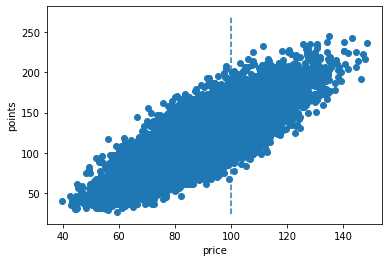

In [216]:
fig = plt.figure()
prices = [team["price"] for team in teams]
points = [team["points"] for team in teams]
plt.scatter(prices, points)
plt.xlabel("price")
plt.ylabel("points")
plt.plot([100, 100], [0.9*min(points), 1.1*max(points)], linestyle="dashed")
fig.show()

In [217]:
valid_indices = np.array(prices) < 100

In [218]:
valid_indices

array([ True,  True, False, ...,  True, False, False])

In [219]:
valid_points = valid_indices * np.array(points)

In [220]:
highest_ranked_valid_teams = np.array(valid_points).argsort()[::-1]

In [221]:
highest_ranked_valid_teams[:10]

array([5974, 8256, 1254, 6815, 5213, 6029, 5867, 7418, 2681, 3472])

In [222]:
for i in range(50):
    print(f"Rank: {i}")
    print(f"   Points: {teams[highest_ranked_valid_teams[i]]['points']}")
    print(f"   Price: {teams[highest_ranked_valid_teams[i]]['price']}")
    print("    Drivers:", [driver.name for driver in teams[highest_ranked_valid_teams[i]]["team"].drivers])
    print("    Constructor:", teams[highest_ranked_valid_teams[i]]["team"].constructor.name)

Rank: 0
   Points: 208
   Price: 98.30000000000001
    Drivers: ['norris', 'latifi', 'verstappen', 'raikkonen', 'perez']
    Constructor: red_bull
Rank: 1
   Points: 204
   Price: 98.1
    Drivers: ['leclerc', 'raikkonen', 'norris', 'giovinazzi', 'verstappen']
    Constructor: red_bull
Rank: 2
   Points: 199
   Price: 97.6
    Drivers: ['mazepin', 'perez', 'russell', 'leclerc', 'verstappen']
    Constructor: red_bull
Rank: 3
   Points: 195
   Price: 95.5
    Drivers: ['gasly', 'norris', 'perez', 'leclerc', 'raikkonen']
    Constructor: red_bull
Rank: 4
   Points: 194
   Price: 97.80000000000001
    Drivers: ['schumacher', 'verstappen', 'perez', 'norris', 'leclerc']
    Constructor: mclaren
Rank: 5
   Points: 193
   Price: 98.29999999999998
    Drivers: ['norris', 'tsunoda', 'alonso', 'verstappen', 'ocon']
    Constructor: red_bull
Rank: 6
   Points: 193
   Price: 92.1
    Drivers: ['russell', 'norris', 'perez', 'leclerc', 'gasly']
    Constructor: red_bull
Rank: 7
   Points: 193
   Pri